In [389]:
#Dylan Hilligoss Project 3 Code ---------> PHYS460----------->UDel Spring 2020

import numpy as np
import random as rand
import matplotlib.pyplot as plt
import statsmodels.api as sm


def metropolis_mc_ising(spin,T,B):
    '''
     Metropolis Monte Carlo update (single sweep) of 2D Ising ferromagnet:
     It takes matrix of spins and temperature as an input and returns 
     matrix of updated spins via Metropolis algorithm; such conversion of 
     input spins into out spins counts as one Monte Carlo time step

     INPUT:
         spin       Input matrix of Ising classical spins on the square lattice
         T          temperature in units in which J=1, k_B=1

     OUTPUT:
         spin       Output matrix of Ising classical spins on the square lattice
    ''' 
    
    beta = 1/T # beta = J/(k_B*T)
    size = np.shape(spin)[1] # Find the dimension of the input matrix
    
    #Passes in neighboring positions of spins
    for i in np.arange(0,size-1):
        for j in np.arange(0,size-1):
            # Find coordinates of neighboring spins for spin at position i,j 
            #while using periodic boundary conditions:
            ipos = np.mod(i,size-1)+1
            jpos = np.mod(j,size-1)+1
            ineg = np.mod(i+size-2,size-1) + 1
            jneg = np.mod(j+size-2,size-1) + 1
            
            old_spin = spin[i,j] #Spin at position i, j of the input matrix
            new_spin = -spin[i,j] # flip the spion and test below if this is allowed
            
            # sum of four spins surrounding spin at position i,j
            spin_sum = spin[i,jpos] + spin[ipos,j] + spin[i,jneg] + spin[ineg,j]
            # energy difference between old and new configuration of five spins 
            # consisting of spin at i,j plus its four nearest neighbors:
            old_energy=-old_spin*spin_sum-(old_spin*B);
            new_energy=-new_spin*spin_sum-(new_spin*B);
            energy_diff = beta * (new_energy - old_energy);
            
            # update spin at position i,j by checking if new_spin is allowed 
            # in accord with the laws of statistical physics
            p = rand.uniform(0,1)
            
            if( (energy_diff <= 0) or (np.exp(-energy_diff) > p) ):
                # Metropolis criterion
                spin[i,j] = new_spin  # accept the change so that spin at position i,j is now flipped
                
    return spin


In [390]:
#magnetization per spin calculation
def magnetization(spins):
    total=0
    magSum=0
    size = np.shape(spins)[1]
    for i in np.arange(0,size-1):
        for j in np.arange(0,size-1):
            total+=1
            magSum+=spins[i][j]
            
    MagperSpin=magSum/total
    return MagperSpin

In [427]:
def master():
#Making an array of B values that sweep up from -5 to 5 and then back down to -5
    nsteps = 1000
    num = 32
    #T = 32
    T = 4.00
    H = 0.0
    #B=np.arange[-5,5]
    spintime = np.zeros((num,num,nsteps))
    Mtime = np.zeros((1,nsteps))
    Etime = np.zeros((1,nsteps))
    spin = -np.ones((num,num))
    spin1 = np.ones((num,num))
    spintime[:,:,0] = spin
    Mtime[0] = np.sum(np.sum(spin)) / (num**2)
    
    #Creates arrays of B values
    B1=np.arange(-5,6,1)
    B2=np.arange(5,-6,-1)
    B=[]
    #B=np.concatenate((B1,B2))
    
    meanMagperSpin=np.zeros(len(B1))
   
    therm=100
    
    #std dev for B=0 on the positive sweep
    posSigma0=0
    
    #std dev for B=1 on the positive sweep
    posSigma1=0
    
    #std dev for B=0 on the negative sweep
    negSigma0=0
    
    #std dev for B=10 on the negaitive sweep
    negSigma1=0
    
    posErrs = np.zeros(len(B1))
    
    negErrs = np.zeros(len(B2))
    
    mags=np.zeros(nsteps-therm)
    
    #B_arrayVals=[5,6]
    
    #Loop that computes Monte Carlo algorithm 2000 for each value of B. Then calculates magnetization at each point
    #Then calculates the mean magnetization per spin
    #mags = np.zeros((nsteps))    
    for i in range(0,len(B1)):
        magSum=0
        for j in range(0,nsteps):
            spin=metropolis_mc_ising(spin,T,B1[i])
            
            if j >= therm:
                
                mag=magnetization(spin)
                
                mags[j-therm]=mag
                
                magSum+=mag
        print("iteration",i+1)        
        meanMagperSpin[i]=magSum/(nsteps-therm)    
       
    #Calculates and plots autocorrelation function 
        if(i==5):
            #autocorrelation(mags,meanMagperSpin[i])
            #sm.graphics.tsa.plot_acf(mags)

            #Creates autocorrelation function for certain B value
            corr=sm.tsa.stattools.acf(mags,nlags=len(mags))
            np.save('pos i='+str(i)+'.npy',corr)
            plt.plot(corr)
            plt.xlim(0,200)
            plt.xlabel("Lag",fontsize=14)
            plt.ylabel("Correlation",fontsize=14)
            plt.title("Correlation Function",fontsize=14)
            plt.show()
            plt.close()

            ############################################
            #loop for calculating std dev starts here
            ############################################

            #value for tau fitted to the correlation function, found experimentally
        tau0=1

            #number of independent samples
        N = len(mags)//tau0

        sigsum=0
        for sample in range(0,N):
            sigsum+=(mags[sample*tau0]-meanMagperSpin[i])**2

        posSigma0 = np.sqrt((1/(N-1))*sigsum)
        print("STANDARD DEVIATION AT THIS STEP IS ", posSigma0)
        posErrs[i]=posSigma0

        if(i==8):
            #autocorrelation(mags,meanMagperSpin[i])
            #sm.graphics.tsa.plot_acf(mags)
            corr=sm.tsa.stattools.acf(mags,nlags=len(mags))
            np.save('pos i='+str(i)+'.npy',corr)
            plt.plot(corr)
            plt.xlim(0,200)
            plt.xlabel("Lag",fontsize=14)
            plt.ylabel("Correlation",fontsize=14)
            plt.title("Correlation Function",fontsize=14)
            plt.show()
            plt.close()

                ############################################
                #loop for calculating std dev starts here
                ############################################

                #value for tau fitted to the correlation function, found experimentally
        tau1=6

                #number of independent samples
        N = len(mags)//tau1

        sigsum=0
        for sample in range(0,N):
            sigsum+=(mags[sample*tau1]-meanMagperSpin[i])**2

        posSigma1 = np.sqrt((1/(N-1))*sigsum)
        print("STANDARD DEVIATION AT THIS STEP IS ", posSigma1)
        posErrs[i]=posSigma1
        #print(magSum)

    meanMagperSpin1=np.zeros(len(B2))

    #Loop that computes Monte Carlo algorithm 2000 for each value of B. Then calculates magnetization at each point
    for i in range(0,len(B2)):
        magSum=0
        for j in range(0,nsteps):
            spin1=metropolis_mc_ising(spin1,T,B2[i])
            if j>=therm:
                mag=magnetization(spin1)
                mags[j-therm]=mag
                magSum+=mag
        print("iteration",i+1)
        meanMagperSpin1[i]=magSum/(nsteps-therm)
        
        if(i==5):
        #autocorrelation(mags,meanMagperSpin[i])
        #sm.graphics.tsa.plot_acf(mags)
            
        #Creates autocorrelation function for certain B value
            corr=sm.tsa.stattools.acf(mags,nlags=len(mags))
            np.save('neg i='+str(i)+'.npy',corr)
            plt.plot(corr)
            plt.xlim(0,200)
            plt.xlabel("Lag",fontsize=14)
            plt.ylabel("Correlation",fontsize=14)
            plt.title("Correlation Function",fontsize=14)
            plt.show()
            plt.close()

        ############################################
        #loop for calculating std dev starts here
        ############################################
            
        #value for tau fitted to the correlation function, found experimentally
        tau0=2

        #number of independent samples
        N = len(mags)//tau0

        sigsum=0
        for sample in range(0,N):
            sigsum+=(mags[sample*tau0]-meanMagperSpin[i])**2

        negSigma0 = np.sqrt((1/(N-1))*sigsum)
        print("STANDARD DEVIATION AT THIS STEP IS ", negSigma0)
        negErrs[i]=negSigma0

        if(i==8):
            #autocorrelation(mags,meanMagperSpin[i])
            #sm.graphics.tsa.plot_acf(mags)
            corr=sm.tsa.stattools.acf(mags,nlags=len(mags))
            np.save('neg i='+str(i)+'.npy',corr)
            plt.plot(corr)
            plt.xlim(0,200)
            plt.xlabel("Lag",fontsize=14)
            plt.ylabel("Correlation",fontsize=14)
            plt.title("Correlation Function",fontsize=14)
            plt.show()
            plt.close()

            ############################################
            #loop for calculating std dev starts here
            ############################################
            
        #value for tau fitted to the correlation function, found experimentally
        tau1=7

            #number of independent samples
        N = len(mags)//tau1

        sigsum=0
        for sample in range(0,N):
            sigsum+=(mags[sample*tau1]-meanMagperSpin[i])**2

        negSigma1 = np.sqrt((1/(N-1))*sigsum)
        print("STANDARD DEVIATION AT THIS STEP IS ", negSigma1)
        negErrs[i]=negSigma1
        #print(magSum)

         
        
    fig=plt.figure(figsize=(8,8))
    ax=fig.add_subplot(1,2,1)
    ax.errorbar(B1,meanMagperSpin,yerr=posErrs,label='Positive Sweep')
    ax.errorbar(B2,meanMagperSpin1,yerr=0.02,label='Negative Sweep') 
    ax.set_title("Mean Magnetization vs. External Field")
    ax.set_xlabel("External Field B")
    ax.set_ylabel("Mean Magnetization")
    ax.legend(loc='best')
    plt.axis('square')
    plt.ylim(-4,4)
    plt.show()

In [428]:
#Hard calculated autocorrelation function ---------------->INCORRECT VERSION SINCE WE USED PREDEFINED PYTHON FUNCTION

#def autocorrelation(m,mbar):
#    C=[]
#    #fit = []
    #A=2800000
    #Tau=37
#    N=len(m)
    #plt.plot(m,label="Magnetization")
#     for lag in range(0,N):
#         total = 0
#        n=0
#        for i in range(0,N-lag):
#            tmp = m[i]*m[i+lag]
#            total+= tmp
#            n+=1

#        C.append(total/n)
        #fit.append(A*np.exp(-lag/Tau)+4940000)
        
#    avgsq=C[0]
#    for i in range(0,len(C)):
        #C[i]=(C[i])/(avgsq)
#        C[i]=(C[i]-(mbar**2))/(avgsq-(mbar**2))
        
#    plt.plot(C,label="Correlation Function")
    #plt.plot(fit,label="Fit")
    #plt.xlim(0,1500)
    #plt.ylim(4500000,8000000)
#    plt.xlabel("Lag",fontsize=14)
#    plt.ylabel("Correlation",fontsize=14)
#    plt.title("Correlation Function",fontsize=14)
    #plt.legend()

iteration 1
STANDARD DEVIATION AT THIS STEP IS  0.006958427992598092
STANDARD DEVIATION AT THIS STEP IS  0.00694244627824438
iteration 2
STANDARD DEVIATION AT THIS STEP IS  0.00892396176125201
STANDARD DEVIATION AT THIS STEP IS  0.009267920704473541
iteration 3
STANDARD DEVIATION AT THIS STEP IS  0.011471092613336793
STANDARD DEVIATION AT THIS STEP IS  0.012087893840408521
iteration 4
STANDARD DEVIATION AT THIS STEP IS  0.014664341988262195
STANDARD DEVIATION AT THIS STEP IS  0.014385676717523251
iteration 5
STANDARD DEVIATION AT THIS STEP IS  0.020650794563801086
STANDARD DEVIATION AT THIS STEP IS  0.017654321002018684
iteration 6


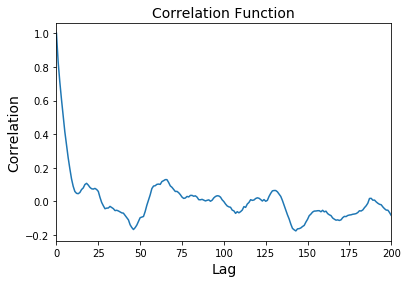

STANDARD DEVIATION AT THIS STEP IS  0.04189455473083109
STANDARD DEVIATION AT THIS STEP IS  0.04112280595813376
iteration 7
STANDARD DEVIATION AT THIS STEP IS  0.024830059632351346
STANDARD DEVIATION AT THIS STEP IS  0.02500571860674145
iteration 8
STANDARD DEVIATION AT THIS STEP IS  0.01573604558659473
STANDARD DEVIATION AT THIS STEP IS  0.014581602386417354
iteration 9
STANDARD DEVIATION AT THIS STEP IS  0.012583952537618102


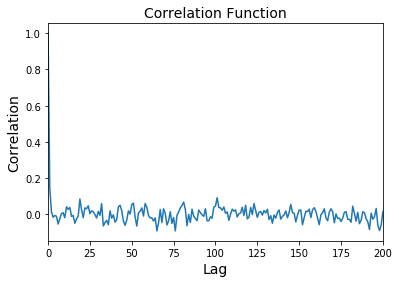

STANDARD DEVIATION AT THIS STEP IS  0.013604585667029708
iteration 10
STANDARD DEVIATION AT THIS STEP IS  0.010447695584122755
STANDARD DEVIATION AT THIS STEP IS  0.011377950015269731
iteration 11
STANDARD DEVIATION AT THIS STEP IS  0.007399284769421247
STANDARD DEVIATION AT THIS STEP IS  0.006939882362724645
iteration 1
STANDARD DEVIATION AT THIS STEP IS  1.9565342803887251
STANDARD DEVIATION AT THIS STEP IS  1.9618708331954835
iteration 2
STANDARD DEVIATION AT THIS STEP IS  1.9263654847122773
STANDARD DEVIATION AT THIS STEP IS  1.9321437506443386
iteration 3
STANDARD DEVIATION AT THIS STEP IS  1.871915936502365
STANDARD DEVIATION AT THIS STEP IS  1.87677186367124
iteration 4
STANDARD DEVIATION AT THIS STEP IS  1.775608202110015
STANDARD DEVIATION AT THIS STEP IS  1.779809087579593
iteration 5
STANDARD DEVIATION AT THIS STEP IS  1.5507903059845818
STANDARD DEVIATION AT THIS STEP IS  1.5575416114770901
iteration 6


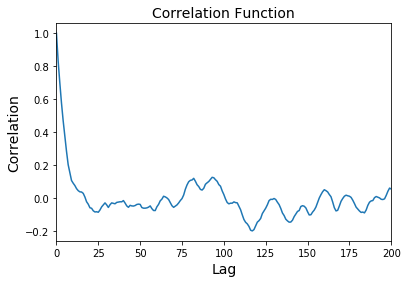

STANDARD DEVIATION AT THIS STEP IS  0.40336857873715376
STANDARD DEVIATION AT THIS STEP IS  0.40582362557022844
iteration 7
STANDARD DEVIATION AT THIS STEP IS  1.3408221928113502
STANDARD DEVIATION AT THIS STEP IS  1.3468450979468531
iteration 8
STANDARD DEVIATION AT THIS STEP IS  1.7150084781568595
STANDARD DEVIATION AT THIS STEP IS  1.7179497613700743
iteration 9
STANDARD DEVIATION AT THIS STEP IS  1.8404563925090027


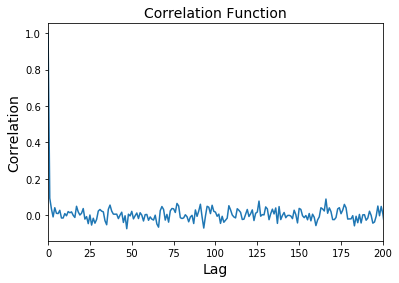

STANDARD DEVIATION AT THIS STEP IS  1.8456944553933372
iteration 10
STANDARD DEVIATION AT THIS STEP IS  1.906622709205075
STANDARD DEVIATION AT THIS STEP IS  1.9115060058493873
iteration 11
STANDARD DEVIATION AT THIS STEP IS  1.9464214628649166
STANDARD DEVIATION AT THIS STEP IS  1.9518621684627173


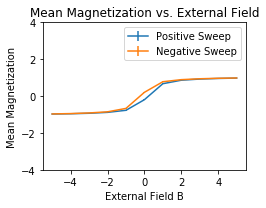

In [429]:
master()

In [435]:
#Function used to fit correlated data
def fitting():
    B0=np.load('pos i=5.npy')
    B1=np.load('pos i=8.npy')
    B2=np.load('neg i=5.npy')
    B3=np.load('neg i=8.npy')
    
    fit0=[]
    fit1=[]
    fit2=[]
    fit3=[]
    tau=4
    tau1=1
    tau2=4
    tau3=1
    
    for i in range(0,len(B0)):
        fit0.append(np.exp(-i/tau))
    
    for i in range(0,len(B1)):
        fit1.append(np.exp(-i/tau1))
        
    for i in range(0,len(B2)):
        fit2.append(np.exp(-i/tau2))
    
    for i in range(0,len(B3)):
        fit3.append(np.exp(-i/tau3))
        
    plt.plot(B0,label="Correlation Function")
    plt.plot(fit0,label="Fit")
    plt.xlim(0,200)
    plt.title("Autocorrelation Fit for B=0 Positive Sweep",fontsize=14)
    plt.xlabel("Lag",fontsize=14)
    plt.ylabel("Correlation",fontsize=14)
    plt.legend()
    plt.show()
    plt.close()
    
    plt.plot(B1,label="Correlation Function")
    plt.plot(fit1,label="Fit")
    plt.xlim(0,200)
    plt.title("Autocorrelation Fit for B=2 Positive Sweep", fontsize=14)
    plt.xlabel("Lag",fontsize=14)
    plt.ylabel("Correlation",fontsize=14)
    plt.legend()
    plt.show()
    plt.close()
    
    plt.plot(B2,label="Correlation Function")
    plt.plot(fit2,label="Fit")
    plt.xlim(0,200)
    plt.title("Autocorrelation Fit for B=0 Negative Sweep",fontsize=14)
    plt.xlabel("Lag",fontsize=14)
    plt.ylabel("Correlation",fontsize=14)
    plt.legend()
    plt.show()
    plt.close()
    
    plt.plot(B3,label="Correlation Function")
    plt.plot(fit3,label="Fit")
    plt.xlim(0,200)
    plt.title("Autocorrelation Fit for B=-2 Negative Sweep",fontsize=14)
    plt.xlabel("Lag",fontsize=14)
    plt.ylabel("Correlation",fontsize=14)
    plt.legend()
    plt.show()
    plt.close()

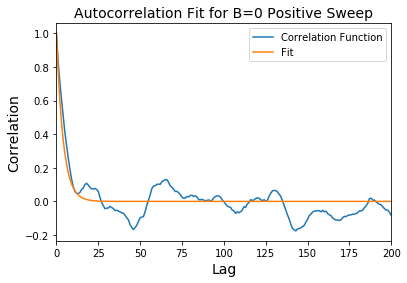

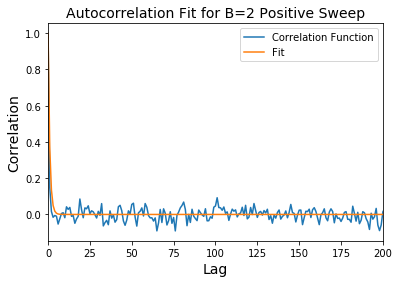

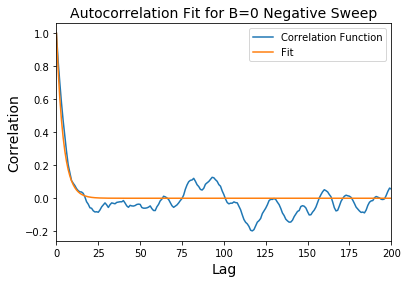

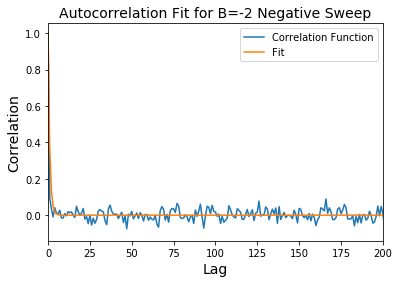

In [436]:
fitting()

In [432]:
def energycalc2(spins,B):
    energy=0
    size=np.shape(spins)[1]
    for i in np.arange(0,size-1):
        for j in np.arange(0,size-1):
            # Find coordinates of neighboring spins for spin at position i,j 
            #while using periodic boundary conditions:
            ipos = np.mod(i,size-1)+1
            jpos = np.mod(j,size-1)+1
            ineg = np.mod(i+size-2,size-1) + 1
            jneg = np.mod(j+size-2,size-1) + 1
            
            current_spin = spins[i,j] #Spin at position i, j of the input matrix
           
            
            # sum of four spins surrounding spin at position i,j
            spin_sum = spins[i,jpos] + spins[ipos,j] + spins[i,jneg] + spins[ineg,j]
            
            energy+=-current_spin*spin_sum-(current_spin*B)
    return energy/(size**2)

In [433]:
def master2():
    temps = [1,2,2.269,3,5]
    B=0
    num=128
    nsteps=1000
    Cv=[0]*len(temps)
    mag_sus=[0]*len(temps)
    
    for i in range(0,len(temps)):
        spin=-np.ones((num,num))
        mags=np.zeros(nsteps)
        E=np.zeros(nsteps)
        magsum=0
        meanMagperSpin=0
        meanMag=0
        
        for j in range(0,nsteps):
            spin=metropolis_mc_ising(spin,temps[i],0)

            mag=magnetization(spin)
            mags[j]=mag
            
            E[j]=energycalc2(spin,0)
            
            magsum+=mag
        
        plt.plot(mags)
        plt.title("Magnetization vs. Metropolis Step for T="+str(temps[i])+" and B=0")
        plt.xlabel("MC Steps")
        plt.ylabel("Magnetization")
        plt.show()
        plt.close()
        
        plt.plot(E)
        plt.title("Energy vs. Metropolis Step for T="+str(temps[i])+" and B=0")
        plt.xlabel("MC Steps")
        plt.ylabel("Energy")
        plt.show()
        plt.close()
        
        plt.imshow(spin,cmap='gray')
        
        plt.show()
        plt.close()
        
      
        #Magnetic Suseptibility Calculation
        meanMagperSpin=magsum/nsteps
        meanMag=meanMagperSpin*(num**2)
        
        msqrSum=0
        for n in range(0,len(mags)):
            msqrSum+=((mags[n]*(num**2))**2)
        
        meanMsqr=(msqrSum/nsteps)
                      
        delMsq=meanMsqr-meanMag**2
        
        mag_sus[i]=(delMsq)/((num**2)*(temps[i]))
    
    #specific heat caluclation
        meanEsqr=0
        meanE=0
        meanEsqrSum=0
        meanESum=0
        for e in range(0,len(E)):
            meanESum+=(E[e]*num**2)
            meanEsqrSum+=(E[e]*num**2)**2
        
        meanEsqr=meanEsqrSum/nsteps
        meanE=meanESum/nsteps
        delEsqr=(meanEsqr - meanE**2)
        Cv[i]=(delEsqr)/((num**2)*(temps[i]**2))
            
            
    
    
    plt.plot(temps,mag_sus)
    plt.title("Magnetic Susceptibility vs. Temperature")
    plt.xlabel("Temperature")
    plt.ylabel("Magnetic Susceptibility")
    plt.show()
    plt.close()
    
    plt.plot(temps,Cv)   
    plt.title("Specific Heat vs. Temperature")
    plt.xlabel("Temperature")
    plt.ylabel("Specific Heat")
    plt.show()
    plt.close()
        

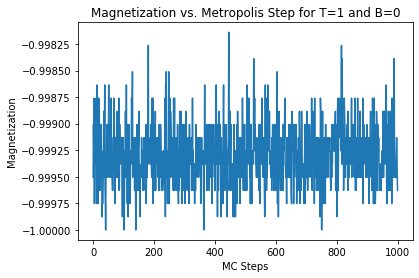

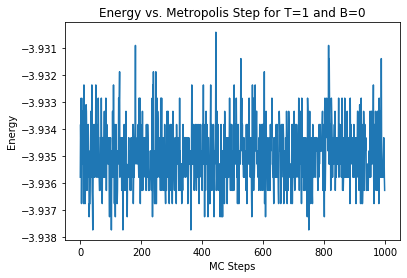

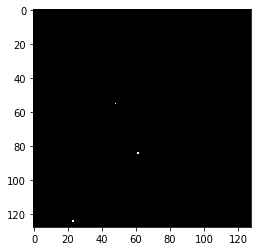

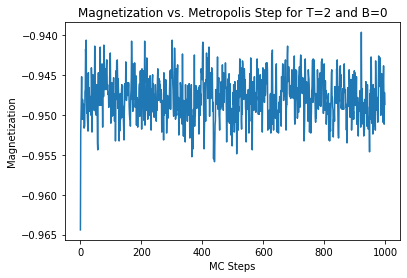

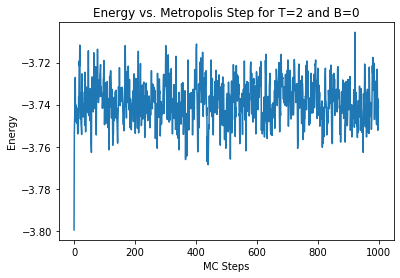

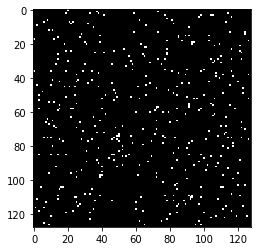

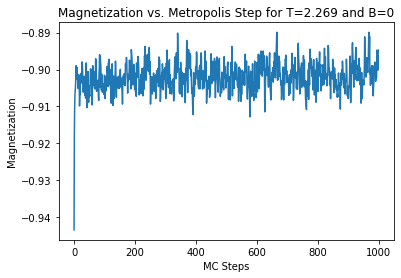

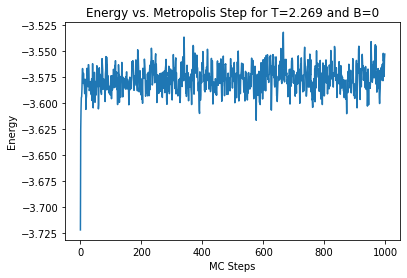

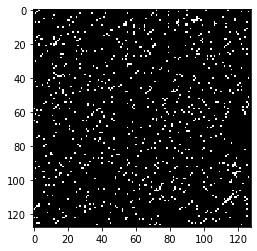

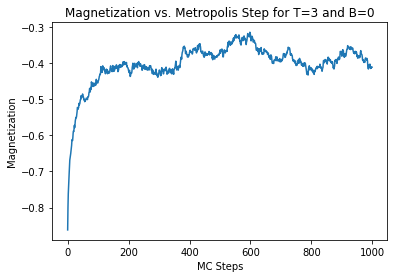

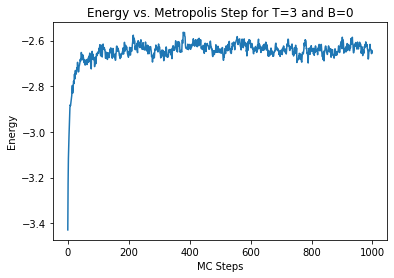

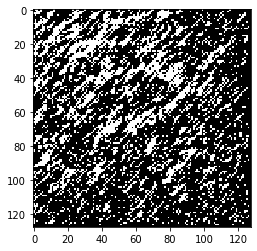

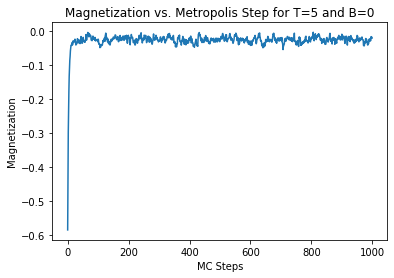

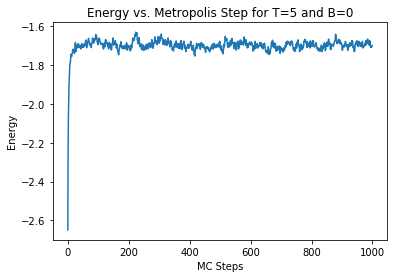

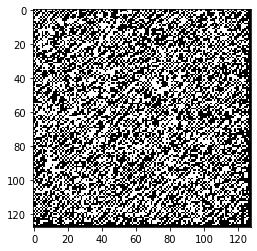

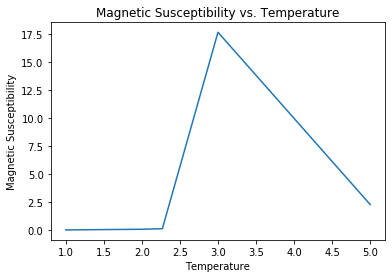

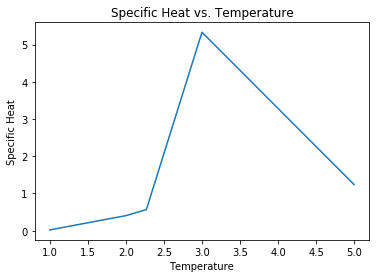

In [434]:
master2()